<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats 
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'sales.csv',
 'lead_conversion.csv',
 'app_wau.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'mall_customers.csv',
 '1_orders_dataset.csv',
 'cookie_cats.csv',
 'sample-sales-data.csv',
 'bz_data_analyis.csv',
 'online_retail_II.xlsx',
 'sales_vs_discount.csv',
 'mock_sales_data.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'scanner_data.csv',
 'ab_experiment.csv',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_customers_dataset.csv',
 'groceries.csv',
 'online_retail.xlsx',
 'sample_data']

In [16]:
df = pd.read_csv('scanner_data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.columns = [a.lower() for a in df.columns]
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df['quantity'] * df['sales_amount']
df.head()

,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,week,rev
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,2015-12-28,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,2015-12-28,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,2015-12-28,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,2015-12-28,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,2015-12-28,6.88


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            131706 non-null  datetime64[ns]
 1   customer_id     131706 non-null  int64         
 2   transaction_id  131706 non-null  int64         
 3   sku_category    131706 non-null  object        
 4   sku             131706 non-null  object        
 5   quantity        131706 non-null  float64       
 6   sales_amount    131706 non-null  float64       
 7   week            131706 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 8.0+ MB


In [18]:
df.describe()

,customer_id,transaction_id,quantity,sales_amount,rev
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524,20.959632
std,6086.447552,18709.901238,3.872667,19.359699,101.323971
min,1.000000,1.000000,0.010000,0.020000,0.000600
25%,7349.000000,16134.000000,1.000000,4.230000,4.500000
50%,13496.000000,32620.000000,1.000000,6.920000,7.640000
75%,17306.000000,48548.000000,1.000000,12.330000,16.440000
max,22625.000000,64682.000000,400.000000,707.730000,13164.800000


In [13]:
df.isnull().sum()

date              0
customer_id       0
transaction_id    0
sku_category      0
sku               0
quantity          0
sales_amount      0
week              0
dtype: int64

In [14]:
df['sku'].value_counts()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
DV08L       1
NXHF1       1
4YL6Q       1
T6EUH       1
9E9GV       1
Name: sku, Length: 5242, dtype: int64

In [15]:
df['sku_category'].value_counts()

N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: sku_category, Length: 187, dtype: int64

In [19]:
print(min(df['date']))
print(max(df['date']))

2016-01-02 00:00:00
2016-12-31 00:00:00


In [21]:
df = df.sort_values(['date','customer_id'])
df.head()

,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,week,rev
154,2016-01-02,3,90,LPF,Y1M2E,2.0,8.16,2015-12-28,16.32
155,2016-01-02,3,90,TW8,WHV3G,1.0,1.38,2015-12-28,1.38
156,2016-01-02,3,90,TW8,WALAE,1.0,1.38,2015-12-28,1.38
145,2016-01-02,178,84,R6E,HO1M5,1.0,24.93,2015-12-28,24.93
146,2016-01-02,178,84,Q4N,699MN,1.0,34.06,2015-12-28,34.06


In [28]:
list_nru = df.groupby(['customer_id'])[['date']].first().reset_index()
list_nru.head()

,customer_id,date
0,1,2016-01-22
1,2,2016-03-24
2,3,2016-01-02
3,4,2016-07-11
4,5,2016-02-09


In [34]:
list_nru = list_nru.rename(columns = {'date':'nru_date'})
list_nru['reg_d90'] = list_nru['nru_date'] + np.timedelta64(90, 'D')
list_nru.head()

,customer_id,nru_date,reg_d90
0,1,2016-01-22,2016-04-21
1,2,2016-03-24,2016-06-22
2,3,2016-01-02,2016-04-01
3,4,2016-07-11,2016-10-09
4,5,2016-02-09,2016-05-09


In [37]:
df2 = pd.merge(df, list_nru, 'left', 'customer_id')
df2.head()

,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,week,rev,nru_date,reg_d90
0,2016-01-02,3,90,LPF,Y1M2E,2.0,8.16,2015-12-28,16.32,2016-01-02,2016-04-01
1,2016-01-02,3,90,TW8,WHV3G,1.0,1.38,2015-12-28,1.38,2016-01-02,2016-04-01
2,2016-01-02,3,90,TW8,WALAE,1.0,1.38,2015-12-28,1.38,2016-01-02,2016-04-01
3,2016-01-02,178,84,R6E,HO1M5,1.0,24.93,2015-12-28,24.93,2016-01-02,2016-04-01
4,2016-01-02,178,84,Q4N,699MN,1.0,34.06,2015-12-28,34.06,2016-01-02,2016-04-01


In [39]:
cnt_ltv = df2[df2['date'] <= df2['reg_d90']]
cnt_ltv = cnt_ltv.groupby(['customer_id'])['rev'].sum().reset_index(name = 'rev')
cnt_ltv.head()

,customer_id,rev
0,1,16.29
1,2,22.77
2,3,19.08
3,4,6.69
4,5,212.55


In [45]:
ltv_quantile = cnt_ltv['rev'].quantile([.25,.5,.75,.95,.99]).reset_index()
ltv_quantile['ratio'] = ltv_quantile[['rev']].apply(lambda x : round(x/max(x)*100,2))
ltv_quantile

,index,rev,ratio
0,0.25,9.4400,1.15
1,0.50,22.1800,2.69
2,0.75,59.8300,7.26
3,0.95,312.2820,37.90
4,0.99,824.0064,100.00


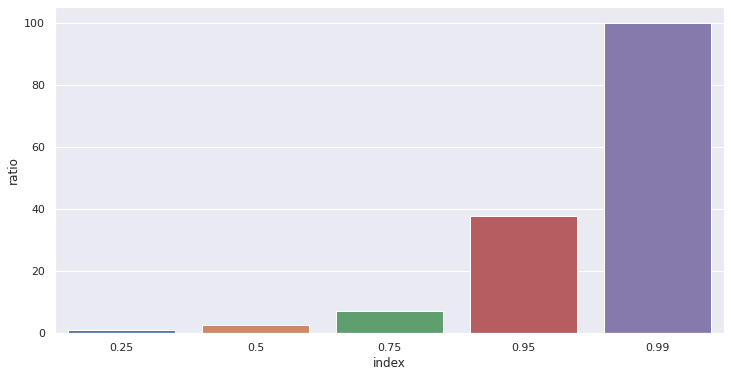

In [46]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.barplot(data = ltv_quantile, x = 'index', y = 'ratio')
plt.show()

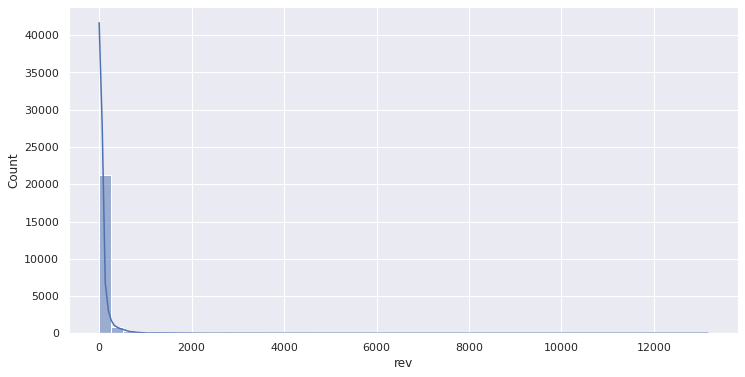

In [49]:
sns.histplot(data = cnt_ltv, x = 'rev', bins = 50, kde = True)
plt.show()

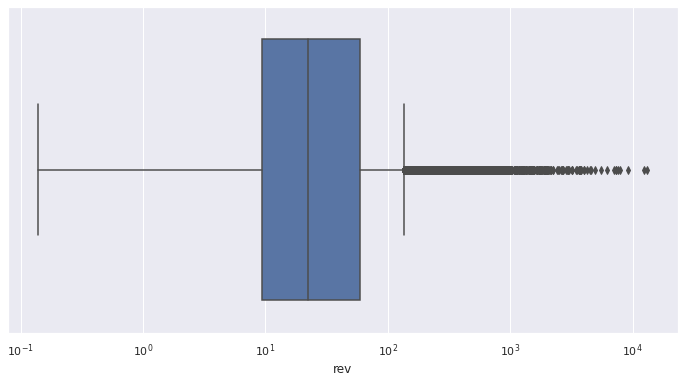

In [50]:
ax = sns.boxplot(data = cnt_ltv, x = 'rev')
ax.set_xscale('log')
plt.show()

# Iterators

In [51]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [52]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [53]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}